<a href="https://colab.research.google.com/github/Rishthegod/blank/blob/master/Updated_Estimating_a_Risk_Factor_Model_for_a_Stock_with_Live_Stock_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader
import matplotlib.pyplot as plt

In [2]:
pandas_datareader.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [3]:
#start = "1926-01-01" # start date of importing data
start = input("Input a start date in the format YYYY-MM-DD")
setfreq = input("type in either M or D for monthly or Daily analysis")

Input a start date in the format YYYY-MM-DD2010-01-01
type in either M or D for monthly or Daily analysisM


In [4]:
ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq= setfreq,start=start).read() #import the 3 factor analysis. frequency we check these factors is monthly, daily is too noisy apparently

In [5]:
ff


{0:          Mkt-RF   SMB   HML    RF
 Date                             
 2010-01   -3.36  0.40  0.43  0.00
 2010-02    3.40  1.19  3.23  0.00
 2010-03    6.31  1.48  2.21  0.01
 2010-04    2.00  4.87  2.89  0.01
 2010-05   -7.89  0.09 -2.44  0.01
 ...         ...   ...   ...   ...
 2022-12   -6.41 -0.68  1.32  0.33
 2023-01    6.65  5.02 -4.05  0.35
 2023-02   -2.58  1.21 -0.78  0.34
 2023-03    2.51 -5.59 -9.01  0.36
 2023-04    0.61 -3.34 -0.03  0.35
 
 [160 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 2010   17.37  14.19  -5.22  0.12
 2011    0.44  -5.71  -8.42  0.04
 2012   16.27  -1.40  10.00  0.06
 2013   35.20   7.75   2.60  0.02
 2014   11.71  -7.86  -1.45  0.02
 2015    0.09  -3.99  -9.65  0.02
 2016   13.30   6.66  22.75  0.20
 2017   21.51  -4.97 -13.51  0.80
 2018   -6.95  -3.21  -9.73  1.83
 2019   28.28  -6.11 -10.34  2.15
 2020   23.66  13.18 -46.56  0.45
 2021   23.56  -3.89  25.53  0.04
 2022  -21.60  -6.82  25.81  1.43,
 

In [6]:
ff_df = ff[0] #factors dataframe, only want first index (the 1162 rows x 4 columns) not whatever the yearly thing is (96rows x 4 columns)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

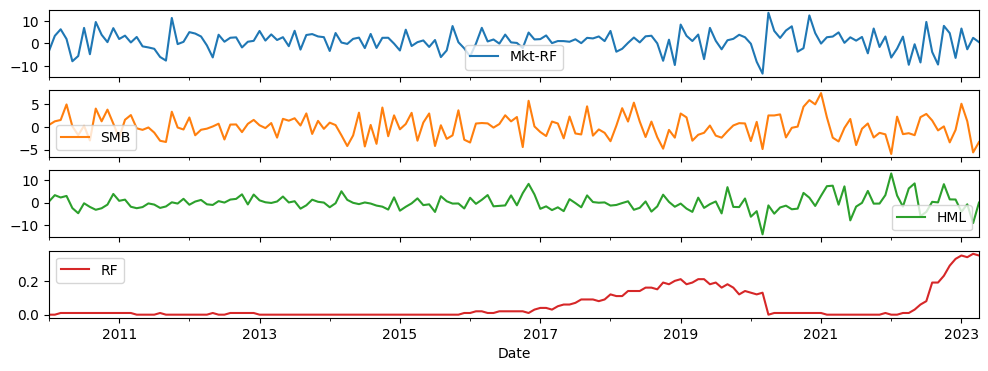

In [7]:
ff_df.plot(subplots=True, figsize=(12,4))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

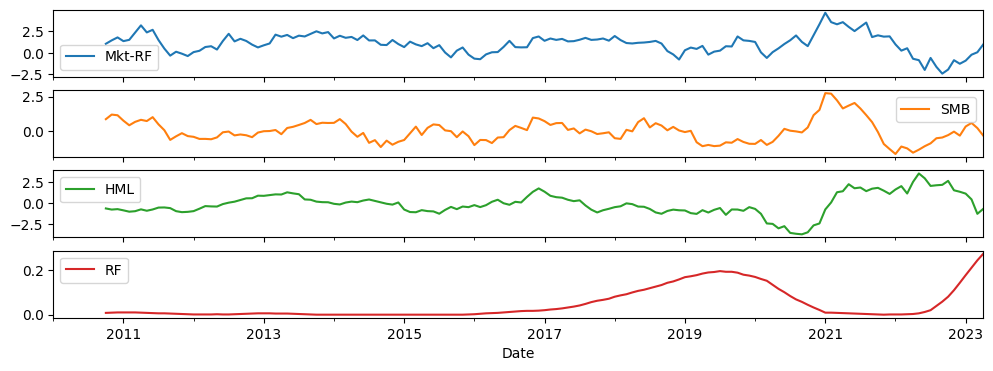

In [8]:
ff_df.rolling(10).mean().plot(subplots=True, figsize=(12,4))

In [9]:
ff_mom_df = pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor',freq=setfreq,start=start ).read()[0] #import momentum factors + already take first index like last time but now in the same command.

array([<Axes: xlabel='Date'>], dtype=object)

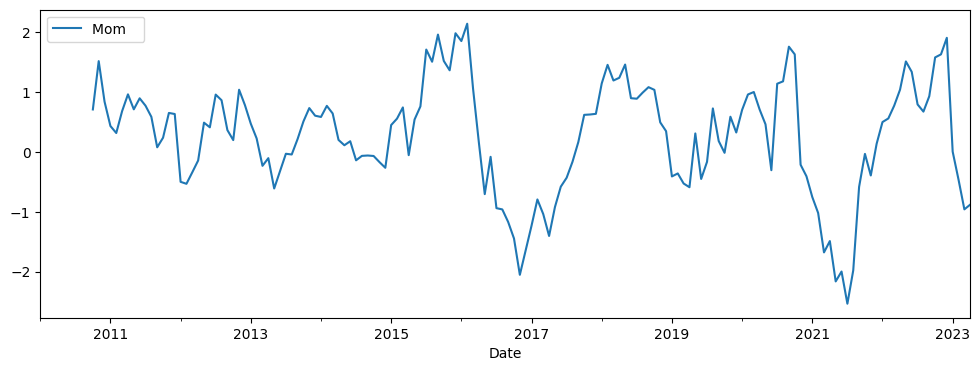

In [10]:
ff_mom_df.rolling(10).mean().plot(subplots=True, figsize=(12,4))

In [11]:
from traitlets.traitlets import validate
import pandas as pd #PD IS AN ALIAS for pandas library so you don't have to type out pandas each time

ffac_merged_df = pd.merge(ff_df,ff_mom_df,on ="Date", how = "inner", sort = True,copy=True,indicator=False, validate='one_to_one' ) #merge both datframes the 3 facctored one and the 1 factored momentum one validate one to one says that each date should only appear once. we do not want indicator that which value came from whcih dataset. inner merge (how) is we want to converge both sets.

In [12]:
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
2010-01,-3.36,0.40,0.43,0.00,-5.40
2010-02,3.40,1.19,3.23,0.00,3.74
2010-03,6.31,1.48,2.21,0.01,3.76
2010-04,2.00,4.87,2.89,0.01,3.16
2010-05,-7.89,0.09,-2.44,0.01,-0.25
...,...,...,...,...,...
2022-12,-6.41,-0.68,1.32,0.33,4.52
2023-01,6.65,5.02,-4.05,0.35,-15.98
2023-02,-2.58,1.21,-0.78,0.34,0.21


In [13]:
!pip install yfinance  #pandasreader outdated so need to install yahoofinance to override outdated commands with new syntax to contact yahoo database

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import yfinance as yf

yf.pdr_override() #override pandas contact methods with yahoo's

SelectedStock = input("Please input a Ticker Symbol")

Please input a Ticker SymbolAAPL


In [15]:
AAPL_data = pandas_datareader.data.get_data_yahoo(SelectedStock,start=start)['Adj Close'].resample(setfreq).ffill().pct_change() #run pandas command again but this time override with yfinance command

[*********************100%***********************]  1 of 1 completed


In [16]:
AAPL_data

Date
2010-01-31         NaN
2010-02-28    0.065396
2010-03-31    0.148470
2010-04-30    0.111021
2010-05-31   -0.016124
                ...   
2023-02-28    0.023183
2023-03-31    0.118649
2023-04-30    0.028987
2023-05-31    0.046058
2023-06-30    0.053202
Freq: M, Name: Adj Close, Length: 162, dtype: float64

In [17]:
AAPL_df = AAPL_data.to_frame()

In [18]:
AAPL_df


,Adj Close
Date,
2010-01-31,NaN
2010-02-28,0.065396
2010-03-31,0.148470
2010-04-30,0.111021
2010-05-31,-0.016124
...,...
2023-02-28,0.023183
2023-03-31,0.118649
2023-04-30,0.028987


array([<Axes: xlabel='Date'>], dtype=object)

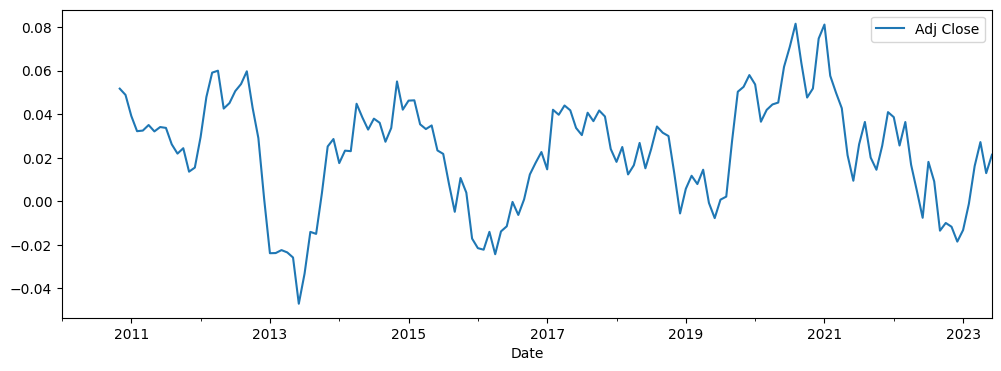

In [19]:
AAPL_df.rolling(10).mean().plot(subplots=True, figsize=(12,4))

In [20]:
AAPL_df.index.dtype #checking datatype for both dataframes before we merge factors and apple data, here we see it is saved as timestamps

dtype('<M8[ns]')

In [21]:
ffac_merged_df.index.dtype #this is saved as a period

period[M]

In [22]:
AAPL_df['str_date'] = AAPL_df.index.astype(str) #create new cloumn in dataframe of aaple where things are stored as strings which will later be converted into a common format for both dataframes
AAPL_df['dt_date'] = pd.to_datetime(AAPL_df['str_date']).dt.strftime('%Y-%m') #creates a new column in which pandas method is called to turn string into date


In [23]:
AAPL_df #as seen dt_date column now has new data type with fromatting same as the factors dataframe, howver we still need to convert the datatype for the factors datframe too

,Adj Close,str_date,dt_date
Date,,,
2010-01-31,NaN,2010-01-31,2010-01
2010-02-28,0.065396,2010-02-28,2010-02
2010-03-31,0.148470,2010-03-31,2010-03
2010-04-30,0.111021,2010-04-30,2010-04
2010-05-31,-0.016124,2010-05-31,2010-05
...,...,...,...
2023-02-28,0.023183,2023-02-28,2023-02
2023-03-31,0.118649,2023-03-31,2023-03
2023-04-30,0.028987,2023-04-30,2023-04


In [24]:
AAPL_df.dt_date.dtype #now saved as object

dtype('O')

In [25]:
ffac_merged_df['str_date'] = ffac_merged_df.index.astype(str)
ffac_merged_df['dt_date'] = pd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y-%m')
ffac_merged_df.dt_date.dtype

dtype('O')

In [26]:
AAPL_ffac_merge_df = pd.merge(AAPL_df, ffac_merged_df, how = 'inner', on = 'dt_date', sort = True, copy = True, validate = "one_to_one") #we merge it baased on the shared cloumn in both"dt_date"

In [27]:
AAPL_ffac_merge_df

,Adj Close,str_date_x,dt_date,Mkt-RF,SMB,HML,RF,Mom,str_date_y
0,NaN,2010-01-31,2010-01,-3.36,0.40,0.43,0.00,-5.40,2010-01
1,0.065396,2010-02-28,2010-02,3.40,1.19,3.23,0.00,3.74,2010-02
2,0.148470,2010-03-31,2010-03,6.31,1.48,2.21,0.01,3.76,2010-03
3,0.111021,2010-04-30,2010-04,2.00,4.87,2.89,0.01,3.16,2010-04
4,-0.016124,2010-05-31,2010-05,-7.89,0.09,-2.44,0.01,-0.25,2010-05
...,...,...,...,...,...,...,...,...,...
155,-0.122272,2022-12-31,2022-12,-6.41,-0.68,1.32,0.33,4.52,2022-12
156,0.110521,2023-01-31,2023-01,6.65,5.02,-4.05,0.35,-15.98,2023-01
157,0.023183,2023-02-28,2023-02,-2.58,1.21,-0.78,0.34,0.21,2023-02
158,0.118649,2023-03-31,2023-03,2.51,-5.59,-9.01,0.36,-2.50,2023-03


In [28]:
AAPL_ffac_merge_df.drop(columns=['str_date_x', 'str_date_y'],inplace = True) #dropping (removing) the two string date columns from merged database

In [29]:
AAPL_ffac_merge_df.rename(columns={'Adj Close': 'AAPL'},inplace=True) #rename the adj close to apple

In [30]:
AAPL_ffac_merge_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom
0,NaN,2010-01,-3.36,0.40,0.43,0.00,-5.40
1,0.065396,2010-02,3.40,1.19,3.23,0.00,3.74
2,0.148470,2010-03,6.31,1.48,2.21,0.01,3.76
3,0.111021,2010-04,2.00,4.87,2.89,0.01,3.16
4,-0.016124,2010-05,-7.89,0.09,-2.44,0.01,-0.25
...,...,...,...,...,...,...,...
155,-0.122272,2022-12,-6.41,-0.68,1.32,0.33,4.52
156,0.110521,2023-01,6.65,5.02,-4.05,0.35,-15.98
157,0.023183,2023-02,-2.58,1.21,-0.78,0.34,0.21
158,0.118649,2023-03,2.51,-5.59,-9.01,0.36,-2.50


In [31]:
AAPL_ffac_merge_df['AAPL_RF'] = AAPL_ffac_merge_df['AAPL']*100 - AAPL_ffac_merge_df['RF'] #change AAPL coloumn decimal representaions of percent change per close to actual percent representaiton like in the market-RiskFree. Then we subract the Risk Free (RF cloumn) percent change from the AAPL percent change to get the excess returns when risk free returns are subracted

In [32]:
AAPL_ffac_merge_df #now new AAPL_RF columsn shows apple returns net of the risk free rate

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
0,NaN,2010-01,-3.36,0.40,0.43,0.00,-5.40,NaN
1,0.065396,2010-02,3.40,1.19,3.23,0.00,3.74,6.539588
2,0.148470,2010-03,6.31,1.48,2.21,0.01,3.76,14.837028
3,0.111021,2010-04,2.00,4.87,2.89,0.01,3.16,11.092138
4,-0.016124,2010-05,-7.89,0.09,-2.44,0.01,-0.25,-1.622444
...,...,...,...,...,...,...,...,...
155,-0.122272,2022-12,-6.41,-0.68,1.32,0.33,4.52,-12.557249
156,0.110521,2023-01,6.65,5.02,-4.05,0.35,-15.98,10.702102
157,0.023183,2023-02,-2.58,1.21,-0.78,0.34,0.21,1.978308
158,0.118649,2023-03,2.51,-5.59,-9.01,0.36,-2.50,11.504862


In [33]:
AAPL_ffac_merge_df.dropna(axis=0,inplace = True) #drop (remove) and rows int he table which have NaN or missing values such as the first one to avoid problems when running regression later on"

In [34]:
list(AAPL_ffac_merge_df) #initially the momentum column randomly had three spaces behind it, now two workaround either reference it always as "Mom   " or rename it to "MOM" which is what we do here

['AAPL', 'dt_date', 'Mkt-RF', 'SMB', 'HML', 'RF', 'Mom   ', 'AAPL_RF']

In [35]:
AAPL_ffac_merge_df.rename(columns={'Mom   ' : 'MOM'},inplace=True)

In [36]:
from statsmodels.api import OLS #Ordinary least squares regression line


results = OLS(AAPL_ffac_merge_df['AAPL_RF'],AAPL_ffac_merge_df[['Mkt-RF','SMB','HML','MOM']], missing='drop').fit() #independent variables are all the factors columns, dependent variables is AAPL_RF or the returns


In [37]:
results.summary() #computer output missing y intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                AAPL_RF   R-squared (uncentered):                   0.476
Model:                            OLS   Adj. R-squared (uncentered):              0.463
Method:                 Least Squares   F-statistic:                              35.23
Date:                Sat, 24 Jun 2023   Prob (F-statistic):                    6.50e-21
Time:                        19:18:35   Log-Likelihood:                         -510.36
No. Observations:                 159   AIC:                                      1029.
Df Residuals:                     155   BIC:                                      1041.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.2775      0.116     10.982      0.000       1.048       1.507
SMB           -0.4041      0.205     -1.970      0.051      -0.809       0.001
HML           -0.5612      0.152     -3.697      0.000      -0.861      -0.261
MOM            0.0802      0.147      0.547      0.585      -0.209       0.370
==============================================================================
Omnibus:                       11.754   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.184
Skew:                          -0.417   Prob(JB):                     0.000186
Kurtosis:                       4.378   Cond. No.                         2.15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
import statsmodels.tools
AAPL_ffac_merge_df_c = statsmodels.tools.add_constant(AAPL_ffac_merge_df,prepend=True) #add constant to a new dataframe

In [39]:
AAPL_ffac_merge_df_c #new y intercept is shown here

,const,AAPL,dt_date,Mkt-RF,SMB,HML,RF,MOM,AAPL_RF
1,1.0,0.065396,2010-02,3.40,1.19,3.23,0.00,3.74,6.539588
2,1.0,0.148470,2010-03,6.31,1.48,2.21,0.01,3.76,14.837028
3,1.0,0.111021,2010-04,2.00,4.87,2.89,0.01,3.16,11.092138
4,1.0,-0.016124,2010-05,-7.89,0.09,-2.44,0.01,-0.25,-1.622444
5,1.0,-0.020827,2010-06,-5.57,-1.82,-4.70,0.01,-2.76,-2.092703
...,...,...,...,...,...,...,...,...,...
155,1.0,-0.122272,2022-12,-6.41,-0.68,1.32,0.33,4.52,-12.557249
156,1.0,0.110521,2023-01,6.65,5.02,-4.05,0.35,-15.98,10.702102
157,1.0,0.023183,2023-02,-2.58,1.21,-0.78,0.34,0.21,1.978308
158,1.0,0.118649,2023-03,2.51,-5.59,-9.01,0.36,-2.50,11.504862


In [40]:
results = OLS(AAPL_ffac_merge_df_c['AAPL_RF'],AAPL_ffac_merge_df_c[['const','Mkt-RF','SMB','HML','MOM']], missing='drop').fit() #add y int as one of the independent vars

In [41]:
print('Risk Factor Model for ' + SelectedStock)
print('Understanding your results: All factors are calculated using the market data from start date-present \n Const coef: average percent under/overperformance of the selected ticker as compared to the market (the Alpha value)\n MKT-RF Coef: This is the Beta (risk exposure) value. A beta of 1.0 means the price of the stock is strongly correlated with the market. A beta value of 1.5 indicates that the price of the stock is 50% more volatile than the market. Tech stocks and small caps tend to have high betas.\n SMB coef: Small versus Big company: positive means the portfolio has more small companies and thus according to the model should outperform portfolios with larger companies in the long run \n HML coef: positive values means the stock/etf is tilted more towards value stocks, negative means that the stock/etf is tilted more towards growth stocks relative to the market \n MOM coef: tendency to move with the momentum of the market \n R squared value: how much of the variability in stock/equity price can be explained by these factors, expressed as a percentage in decimal form \n Note: P>|t| is the significance value for each coefficient General rule of thumb: signifance val should be <0.15 for the value to be statistically significant')
results.summary()#updated mathematically correct results


Risk Factor Model for AAPL
Understanding your results: All factors are calculated using the market data from start date-present 
 Const coef: average percent under/overperformance of the selected ticker as compared to the market (the Alpha value)
 MKT-RF Coef: This is the Beta (risk exposure) value. A beta of 1.0 means the price of the stock is strongly correlated with the market. A beta value of 1.5 indicates that the price of the stock is 50% more volatile than the market. Tech stocks and small caps tend to have high betas.
 SMB coef: Small versus Big company: positive means the portfolio has more small companies and thus according to the model should outperform portfolios with larger companies in the long run 
 HML coef: positive values means the stock/etf is tilted more towards value stocks, negative means that the stock/etf is tilted more towards growth stocks relative to the market 
 MOM coef: tendency to move with the momentum of the market 
 R squared value: how much of the var

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL_RF   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     30.76
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           8.10e-19
Time:                        19:18:35   Log-Likelihood:                -508.12
No. Observations:                 159   AIC:                             1026.
Df Residuals:                     154   BIC:                             1042.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0417      0.497      2.097      0.038       0.060       2.023
Mkt-RF         1.2085      0.120     10.098      0.000       0.972       1.445
SMB           -0.3746      0.203     -1.842      0.067      -0.776       0.027
HML           -0.5558      0.150     -3.701      0.000      -0.852      -0.259
MOM            0.0383      0.146      0.261      0.794      -0.251       0.328
==============================================================================
Omnibus:                       11.202   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               16.129
Skew:                          -0.402   Prob(JB):                     0.000315
Kurtosis:                       4.337   Cond. No.                         5.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Linear Regression')

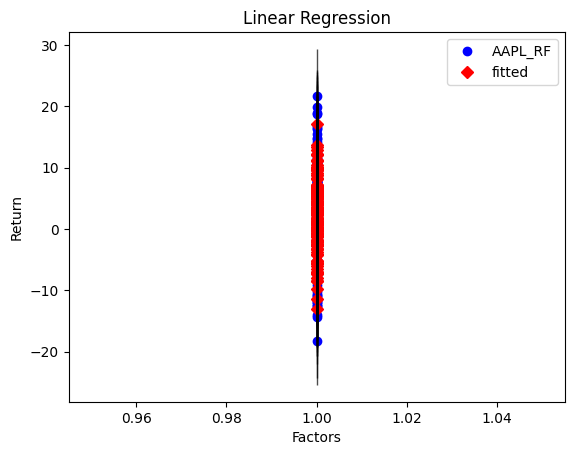

In [46]:
#work in progress
import statsmodels.api as sm

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig = sm.graphics.plot_fit(results, 0, ax=ax)

ax.set_ylabel("Return")

ax.set_xlabel("Factors")

ax.set_title("Linear Regression")